Рассмотрим Optimal Brain Damage для задачи тематического моделирования. Напомним, перед нами ставится задача максимизации: 
$$
L = \sum_{d,w} n_{dw} \log \sum_{t} \phi_{wt} \theta_{td}
$$
У нас есть какое-то решение $\phi$  и $\theta$, мы хотим его сделать более разреженным, сохранив структуру и несильно испортив правдоподобие, используя метод OBD. 

Далее будем использовать стандартные обозначения ARTM ($p_{tdw}$, $n_{wt}$, $n_t$ и так далее).

### Математическая составляющая
####Зануление $\Phi$
 Для каждого $w$, $t$ определелим изменение правдоподобия при занулении $\phi_{wt}$:
$$
\Delta_1 L = \sum_{d} n_{dw} \left( \log \sum_{s\colon s\neq t} \phi_{ws} \theta_{sd} - \log \sum_{s} \phi_{ws} \theta_{sd} \right)=
\sum_{d} n_{dw} \log \frac{\sum_{s\colon s\neq t} \phi_{ws} \theta_{sd} }{\sum_{s} \phi_{ws} \theta_{sd}}=
$$
$$
=
\sum_{d} n_{dw} \log \left( 1 - \frac{\phi_{wt} \theta_{td} }{\sum_{s} \phi_{ws} \theta_{sd}} \right) =
\sum_{d} n_{dw} \log(1 - p_{tdw}) \approx - \sum_{d} n_{dw} p_{tdw} = - n_{wt}
$$
Таким образом, если мы хотим занулять параметры модели для разреживания, кажется, что нужно занулять параметры с наименьшим значением $n_{wt}$. Однако, здесь опускается один важный момент: когда мы разреживаем модель и зануляем какой-то $\phi_{wt}$, вероятность всех остальных слов в теме увеличивается, а это увеличивает правдоподобие. Оценим эффект увеличения логарифма правдоподобия при занулении $\phi_{wt}$:
$$
\Delta_2 L = \sum_{d, u \neq w} n_{du} \left( \log \left( \sum_{s \neq t} \phi_{us} \theta_{sd}  + \frac{\phi_{us}}{1 - \phi_{wt}} \theta_{td} \right) - \log \sum_{s} \phi_{us} \theta_{sd} \right)=
$$
$$
=\sum_{d, u \neq w} n_{du} \left( \log \left( \sum_{s} \phi_{us} \theta_{sd}  + \frac{\phi_{wt}}{1 - \phi_{wt}} \phi_{us} \theta_{td} \right) - \log \sum_{s} \phi_{us} \theta_{sd} \right)=
$$
$$
=\sum_{d, u \neq w} n_{du} \log \left(1 + \frac{\phi_{wt}}{1 - \phi_{wt}} \frac{\phi_{us} \theta_{td} }{\sum_{s} \phi_{us} \theta_{sd}}\right) = \sum_{d, u \neq w} n_{du}  \log \left(1 + \frac{\phi_{wt}}{1 - \phi_{wt}} p_{tdu}\right) \approx
$$
$$
\approx \sum_{d, u \neq w} n_{du} \frac{\phi_{wt}}{1 - \phi_{wt}} p_{tdu} = \frac{\phi_{wt}}{1 - \phi_{wt}} \sum_{d, u \neq w} n_{du} p_{tdu} = \frac{\phi_{wt}}{1 - \phi_{wt}} \left( n_t - n_{wt}\right) = 
$$
$$
=\frac{\phi_{wt} n_t}{1 - \phi_{wt}} \left( 1 - \frac{n_{wt}}{n_t}\right) \approx n_{wt}
$$
В первом приближении за счёт увеличения $\phi_{ut}$ при $u \neq w$ логарифм правдоподобия увеличится на $n_{wt}$. То есть суммарно в первом приближении правдоподобие не изменится. У данной проблемы есть два решения. Во-первых, мы можем честно посчитать $\Delta_1 L $ и $\Delta_2 L $ на Е-шаге и использовать их сумму (их можно эффективно быстро подсчитать, однако есть минус, что есть логарифмы, а это сказывается на скорости выполнения). Второй способ - разложить изменение не до первого члена в ряде тейлора, а до второго.
$$
\Delta_1 L = \sum_{d} n_{dw} \log(1 - p_{tdw}) \approx = - \sum_{d} n_{dw} \left( p_{tdw} + \frac12 p_{tdw}^2\right) = -n_{wt} -  \frac12 \sum_{d} n_{dw} p_{tdw}^2
$$
$$
\Delta_2 L = \sum_{d, u \neq w} n_{du}  \log \left(1 + \frac{\phi_{wt}}{1 - \phi_{wt}} p_{tdu}\right) \approx
\sum_{d, u \neq w} n_{du}  \left(\frac{\phi_{wt}}{1 - \phi_{wt}} p_{tdu} - \frac12\left( \frac{\phi_{wt}}{1 - \phi_{wt}}  \right)^2 p_{tdu}^2\right) =
$$
$$
= \frac{\phi_{wt}}{1 - \phi_{wt}}  \left( n_t - n_{wt}\right) - \frac12\left( \frac{\phi_{wt}}{1 - \phi_{wt}}  \right)^2 \sum_{d, u \neq w} n_{du} p_{tdu}^2 \approx n_{wt} - \frac12\left( \frac{\phi_{wt}}{1 - \phi_{wt}}  \right)^2 \sum_{d, u \neq w} n_{du} p_{tdu}^2
$$
Итак,
$$
\Delta L = \Delta_1 L + \Delta_2 L \approx -  \frac12 \sum_{d} n_{dw} p_{tdw}^2 - \frac12\left( \frac{\phi_{wt}}{1 - \phi_{wt}}  \right)^2 \sum_{d, u \neq w} n_{du} p_{tdu}^2
$$
Это тоже можно эффективно подсчитать на E шаге, только теперь не будет логарифмов, а значит считаться будет быстрее.
####Зануление $\Theta$
Аналогично доказывается, что
$$
\Delta L = \sum_w n_{dw} \log \left( 1 - p_{tdw}\right) - n_d \log(1 - \theta_{td})
$$
###Как это можно использовать
1. Для разреживания модели на Е шаге. Можно разреживать уже имеющееся хорошее решение, можно делать по ходу итераций.
2. Когда мы хотим выбирать характерные слова из темы, можно выбирать не по $\phi_{wt}$, а по $\Delta_1 L + \Delta_2 L$.

#Питоновская реализация EM алгоритма

Полезно проделать, чтобы разобраться в numpy и в том, как эффективно писать на питоне.

In [1]:
import numpy as np
import scipy
import scipy.sparse
from sklearn.datasets import fetch_20newsgroups
import gensim
from collections import Counter
import heapq
import nltk
from nltk.corpus import stopwords
from sklearn.cross_validation import cross_val_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline

Нужно скачать некоторые коллекции данных и установить библиотеки (nltk, gensim)

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/tylorn/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
english_stopwords = set(stopwords.words('english'))

## Исходники, можно пропускать

In [4]:
def trivial_p_dwt_processor(p_dwt):
    pass

def create_frac_of_max_p_dwt_processor(frac_size):
    def fun(p_dwt):
        maximums = np.max(p_dwt, axis=1)
        p_dwt[p_dwt < frac_size * maximums[:, np.newaxis]] = 0.
        p_dwt /= (np.sum(p_dwt, axis=1)[:, np.newaxis] + 1e-10)
    return fun

In [5]:
def perform_e_step_update(it_num, freq_matrix, docptr, phi_matrix, theta_matrix, params):
    block_size = params.get('block_size', 1)
    p_dwt_processor = params.get('p_dwt_processor', lambda x: None)
    event_handler = params.get('event_handler', EmptyHandler())
    
    D, W = freq_matrix.shape
    T = phi_matrix.shape[0]
    n_wt, n_dt = np.zeros((W, T)), np.zeros((D, T))
    transposed_phi_matrix = np.transpose(phi_matrix)
    
    indices = freq_matrix.indices
    indptr = freq_matrix.indptr
    data = freq_matrix.data
    
    for block_num in xrange((D + block_size - 1) / block_size):
        block_start = block_num * block_size
        block_finish = min(D, block_start + block_size)
        ind_start, ind_finish = indptr[block_start], indptr[block_finish]
        
        datas = data[ind_start:ind_finish]
        words = indices[ind_start:ind_finish]
        docs = docptr[ind_start:ind_finish]
        
        p_dwt = transposed_phi_matrix[words] * theta_matrix[docs, :]
        p_dwt /= (np.sum(p_dwt, axis=1)[:, np.newaxis] + 1e-20)
        p_dwt_processor(p_dwt)
        p_dwt *= datas[:, np.newaxis]
        
        for doc_num in xrange(block_start, block_finish):
            doc_start, doc_finish = indptr[doc_num], indptr[doc_num + 1]
            doc_p_dwt = p_dwt[(doc_start - ind_start):(doc_finish - ind_start), :]
            n_dt[doc_num, :] += np.sum(doc_p_dwt, axis=0)
            n_wt[indices[doc_start:doc_finish], :] += doc_p_dwt
            
    event = {
        'n_wt': n_wt,
        'n_dt': n_dt,
        'freq_matrix': freq_matrix,
        'phi_matrix': phi_matrix,
        'theta_matrix': theta_matrix,
        'docptr': docptr,
        'it_num': it_num
    }
    event_handler.handle(event)

    return n_wt, n_dt

In [196]:
def perform_e_step_update_naive_obd(it_num, freq_matrix, docptr, phi_matrix, theta_matrix, params):
    block_size = params.get('block_size', 1)
    p_dwt_processor = params.get('p_dwt_processor', lambda x: None)
    event_handler = params.get('event_handler', EmptyHandler())
    
    # parametrs for phi_obd
    phi_obg = params.get('phi_obg', False)
    phi_percentile = params.get('phi_percentile', 99)
    phi_max_bound = params.get('phi_max_bound', 1e9)
    phi_min_bound = params.get('phi_min_bound', 0.)
    
    # parametrs for phi_obd
    theta_obg = params.get('theta_obg', False)
    theta_percentile = params.get('theta_percentile', 99)
    theta_max_bound = params.get('theta_max_bound', 1e9)
    theta_min_bound = params.get('theta_min_bound', 0.)
    
    D, W = freq_matrix.shape
    T = phi_matrix.shape[0]
    n_wt, n_dt = np.zeros((W, T)), np.zeros((D, T))
    transposed_phi_matrix = np.transpose(phi_matrix)
    
    indices = freq_matrix.indices
    indptr = freq_matrix.indptr
    data = freq_matrix.data
    
    for block_num in xrange((D + block_size - 1) / block_size):
        block_start = block_num * block_size
        block_finish = min(D, block_start + block_size)
        ind_start, ind_finish = indptr[block_start], indptr[block_finish]
        
        datas = data[ind_start:ind_finish]
        words = indices[ind_start:ind_finish]
        docs = docptr[ind_start:ind_finish]
        
        p_dwt = transposed_phi_matrix[words] * theta_matrix[docs, :]
        p_dwt /= (np.sum(p_dwt, axis=1)[:, np.newaxis] + 1e-20)
        p_dwt_processor(p_dwt)
        p_dwt *= datas[:, np.newaxis]
        
        for doc_num in xrange(block_start, block_finish):
            doc_start, doc_finish = indptr[doc_num], indptr[doc_num + 1]
            doc_p_dwt = p_dwt[(doc_start - ind_start):(doc_finish - ind_start), :]
            n_dt[doc_num, :] += np.sum(doc_p_dwt, axis=0)
            n_wt[indices[doc_start:doc_finish], :] += doc_p_dwt
            
    event = {
        'n_wt': n_wt.copy(),
        'n_dt': n_dt.copy(),
        'freq_matrix': freq_matrix,
        'phi_matrix': phi_matrix,
        'theta_matrix': theta_matrix,
        'docptr': docptr,
        'it_num': it_num
    }
    
    if phi_obg:
        bound = max(min(np.percentile(n_wt[n_wt > 0], 100. - phi_percentile), phi_max_bound), phi_min_bound)
        n_wt[n_wt <= bound] = 0.
        if event_handler.requires('n_wt_obded'):
            event['n_wt_obded'] = n_wt
    
    if theta_obg:
        bound = max(min(np.percentile(n_dt[n_dt > 0], 100. - theta_percentile), theta_max_bound), theta_min_bound)
        n_dt[n_dt <= bound] = 0.
        if event_handler.requires('n_dt_obded'):
            event['n_dt_obded'] = n_dt
            
    event_handler.handle(event)

    return n_wt, n_dt

In [218]:
def perform_obg_e_step_update(it_num, freq_matrix, docptr, phi_matrix, theta_matrix, params):
    # parametr for computational efficiecy
    block_size = params.get('block_size', 1)
    event_handler = params.get('event_handler', EmptyHandler())
    
    # parametrs for phi_obd
    phi_obg = params.get('phi_obg', False)
    phi_percentile = params.get('phi_percentile', 99)
    phi_k_size = params.get('phi_k_size', 1)
    phi_max_bound = params.get('phi_max_bound', - np.log(1e-20) - 1.)
    phi_min_bound = params.get('phi_min_bound', 0.)
    
    # parametrs for phi_obd
    theta_obg = params.get('theta_obg', False)
    theta_percentile = params.get('theta_percentile', 99)
    theta_k_size = params.get('theta_k_size', 1)
    theta_max_bound = params.get('theta_max_bound',  - np.log(1e-20) - 1.)
    theta_min_bound = params.get('theta_min_bound', 0.)
    
    # event for event handler
    event = {
        'freq_matrix': freq_matrix,
        'phi_matrix': phi_matrix,
        'theta_matrix': theta_matrix,
        'docptr': docptr,
        'it_num': it_num
    }
    
    D, W = freq_matrix.shape
    T = phi_matrix.shape[0]
    n_wt, n_dt = np.zeros((W, T)), np.zeros((D, T))
    if phi_obg:
        alpha_wt, beta_wt = np.zeros((W, T)), np.zeros((W, T))
    if theta_obg:
        alpha_dt = np.zeros((D, T))
    transposed_phi_matrix = np.transpose(phi_matrix)
    
    indices = freq_matrix.indices
    indptr = freq_matrix.indptr
    data = freq_matrix.data
    
    for block_num in xrange((D + block_size - 1) / block_size):
        block_start = block_num * block_size
        block_finish = min(D, block_start + block_size)
        ind_start, ind_finish = indptr[block_start], indptr[block_finish]
        
        datas = data[ind_start:ind_finish]
        words = indices[ind_start:ind_finish]
        docs = docptr[ind_start:ind_finish]
        
        p_dwt = transposed_phi_matrix[words] * theta_matrix[docs, :]
        p_dwt /= (np.sum(p_dwt, axis=1)[:, np.newaxis] + 1e-20)
        
        alpha_dwt = np.log(1. - p_dwt) * datas[:, np.newaxis]
        beta_dwt = np.log(1. + p_dwt) * datas[:, np.newaxis]
        n_dwt = p_dwt * datas[:, np.newaxis]
        
        for doc_num in xrange(block_start, block_finish):
            doc_start, doc_finish = indptr[doc_num], indptr[doc_num + 1]
            
            doc_n_dwt = n_dwt[(doc_start - ind_start):(doc_finish - ind_start), :]
            doc_alpha_dwt = alpha_dwt[(doc_start - ind_start):(doc_finish - ind_start), :]
            doc_beta_dwt = beta_dwt[(doc_start - ind_start):(doc_finish - ind_start), :]
            
            n_dt[doc_num, :] += np.sum(doc_n_dwt, axis=0)
            positions = indices[doc_start:doc_finish]
            n_wt[positions, :] += doc_n_dwt
            
            if theta_obg:
                alpha_dt[doc_num, :] += np.sum(doc_alpha_dwt, axis=0)
                
            if phi_obg:
                alpha_wt[positions, :] += doc_alpha_dwt
                beta_wt[positions, :] += doc_beta_dwt
    
    if event_handler.requires('n_wt'):
        event['n_wt'] = np.copy(n_wt)
    if event_handler.requires('n_dt'):
        event['n_dt'] = np.copy(n_dt)
        
    if phi_obg:
        beta_t = np.sum(beta_wt, axis=0)
        gamma_wt = alpha_wt + transposed_phi_matrix * (1. - transposed_phi_matrix) * (beta_t[np.newaxis, :] - beta_wt)
        if event_handler.requires('gamma_wt'):
            event['gamma_wt'] = np.copy(gamma_wt)

        positions = gamma_wt >= 0
        bound = max(min(np.percentile(gamma_wt[~positions], phi_percentile), -phi_min_bound), -phi_max_bound)
        gamma_wt[positions] = -1e9
        argp = np.argpartition(gamma_wt, -phi_k_size, axis=1)[:, -phi_k_size:]

        gamma_wt[positions] = 0
        positions[np.arange(W)[:, np.newaxis], argp] = True
        positions[gamma_wt < bound] = False
        n_wt[positions] = 0.
        if event_handler.requires('gamma_wt_obded'):
            event['gamma_wt_obded'] = np.copy(gamma_wt)
        if event_handler.requires('n_wt_obded'):
            event['n_wt_obded'] = np.copy(n_wt)
    
    if theta_obg:
        gamma_dt = alpha_dt + np.sum(n_dt, axis=1)[:, np.newaxis] * np.log(1. - theta_matrix)
        if event_handler.requires('gamma_dt'):
            event['gamma_dt'] = np.copy(gamma_dt)
        
        positions = (gamma_dt >= 0) | np.isnan(gamma_dt)
        bound = max(min(np.percentile(gamma_dt[~positions], theta_percentile), -theta_min_bound), -theta_max_bound)
        
        gamma_dt[positions] = -1e9
        argp = np.argpartition(gamma_dt, -theta_k_size, axis=1)[:, -theta_k_size:]
        
        gamma_dt[positions] = 0
        positions[np.arange(D)[:, np.newaxis], argp] = True
        positions[gamma_dt < bound] = False
        n_dt[positions] = 0.
        if event_handler.requires('gamma_dt_obded'):
            event['gamma_dt_obded'] = np.copy(gamma_dt)
        if event_handler.requires('n_dt_obded'):
            event['n_dt_obded'] = np.copy(n_dt)
    
    event_handler.handle(event)
    return n_wt, n_dt

In [146]:
def launch_em(
    freq_matrix, 
    phi_matrix,
    theta_matrix,
    regularizations_list,
    params_list,
    iters_count=100
):
    phi_matrix = np.copy(phi_matrix)
    theta_matrix = np.copy(theta_matrix)
    docptr = []
    indptr = freq_matrix.indptr
    for doc_num in xrange(D):
        docptr.extend([doc_num] * (indptr[doc_num + 1] - indptr[doc_num]))
    docptr = np.array(docptr)
    
    for it in xrange(iters_count):
        n_wt, n_dt = params_list[it]['method'](it, freq_matrix, docptr, phi_matrix, theta_matrix, params_list[it])
        r_wt, r_dt = regularizations_list[it](n_wt, n_dt, phi_matrix, theta_matrix)
        n_wt = np.maximum(n_wt + r_wt, 0)
        n_dt = np.maximum(n_dt + r_dt, 0)
        n_wt /= np.sum(n_wt, axis=0)
        n_dt /= np.sum(n_dt, axis=1)[:, np.newaxis]
        phi_matrix = np.transpose(n_wt)
        theta_matrix = n_dt
        
    return phi_matrix, theta_matrix

In [76]:
def trivial_regularization(n_wt, n_dt, phi_matrix, theta_matrix):
    return 0., 0.

def calculate_decorr(phi_matrix):
    aggr_phi = np.sum(phi_matrix, axis=1)
    return np.sum(phi_matrix * (aggr_phi[:, np.newaxis] - phi_matrix))

def create_reg_decorr_naive(tau, theta_alpha=0.):
    def fun (n_wt, n_dt, phi_matrix, theta_matrix):
        aggr_phi = np.sum(phi_matrix, axis=1)
        return - tau * np.transpose(phi_matrix * (aggr_phi[:, np.newaxis] - phi_matrix)), theta_alpha
    return fun

def create_reg_lda(phi_alpha, theta_alpha):
    def fun (n_wt, n_dt, phi_matrix, theta_matrix):
        return phi_alpha, theta_alpha
    return fun

def create_reg_decorr_unbiased(tau, theta_alpha=0.):
    def fun (n_wt, n_dt, phi_matrix, theta_matrix):
        tmp_phi =  n_wt / np.sum(n_wt, axis=0)
        aggr_phi = np.sum(tmp_phi, axis=0)
        return - tau * tmp_phi * (aggr_phi[np.newaxis, :] - tmp_phi), theta_alpha
    return fun

def calculate_likelihood(freq_matrix, docptr, phi_matrix, theta_matrix, block_size=1):
    D, W = freq_matrix.shape
    T = phi_matrix.shape[0]
    transposed_phi_matrix = np.transpose(phi_matrix)
    
    indices = freq_matrix.indices
    indptr = freq_matrix.indptr
    data = freq_matrix.data
    
    res = 0.
    for block_num in xrange((D + block_size - 1) / block_size):
        block_start = block_num * block_size
        block_finish = min(D, block_start + block_size)
        ind_start, ind_finish = indptr[block_start], indptr[block_finish]
        
        datas = data[ind_start:ind_finish]
        words = indices[ind_start:ind_finish]
        docs = docptr[ind_start:ind_finish]
        
        p_dwt = transposed_phi_matrix[words] * theta_matrix[docs, :]
        res += np.sum(np.log(np.sum(p_dwt, axis=1) + 1e-20) * datas)
    
    return res

class EmptyLogger(object):
    def iteration(*args):
        pass
    def final_info(self, ):
        pass
    
class DecorrWatcher(object):
    def __init__(self, tau):
        self.tau = tau

    def iteration(self, iter_num, freq_matrix, docptr, phi_matrix, theta_matrix, res):
        print iter_num
        likelihood = calculate_likelihood(freq_matrix, docptr, phi_matrix, theta_matrix, 50)
        decorr = calculate_decorr(phi_matrix)
        print 'L', likelihood
        print 'decorr', decorr
        print 'L + tau R', likelihood - self.tau * decorr
        non_zeros = np.sum(phi_matrix > 1e-20)
        size = phi_matrix.shape[0] * phi_matrix.shape[1]
        print 'Phi non zeros elements', non_zeros, '   fraction', round(1. * non_zeros / size, 2)
        non_zeros = np.sum(theta_matrix > 1e-20)
        size = theta_matrix.shape[0] * theta_matrix.shape[1]
        print 'Theta non zeros elements', non_zeros, '   fraction', round(1. * non_zeros / size, 2)
    def final_info(self):
        pass

class GammaWTWatcher(object):
    def __init__(self, plots_count, fig_num):
        self.fig_num = fig_num
        self.plots_count = plots_count
        self.curr_iter = 0
        plt.figure(fig_num, figsize=(13, 4 * plots_count))

    def iteration(self, gamma_wt, n_wt):
        plt.figure(self.fig_num)
        if self.curr_iter < self.plots_count:
            indices = (gamma_wt < 0) & (gamma_wt > -1000) & (n_wt > 0)

            plt.subplot(self.plots_count, 3, 3 * self.curr_iter + 1)
            plt.hist(np.log(- gamma_wt[indices]).flatten(), bins=100)
            plt.ylabel(r'number of occurences')
            plt.xlabel(r'log gamma_wt')

            plt.subplot(self.plots_count, 3, 3 * self.curr_iter + 2)
            plt.xlabel(r'log n_wt')
            plt.ylabel(r'log gamma_wt')
            plt.scatter(np.log(n_wt[indices]).flatten(), np.log(- gamma_wt[indices]).flatten())

            plt.subplot(self.plots_count, 3, 3 * self.curr_iter + 3)
            plt.xlabel(r'log n_wt')
            plt.ylabel(r'log gamma_wt')
            heatmap, xedges, yedges = np.histogram2d(np.log(n_wt[indices]).flatten(), np.log(- gamma_wt[indices]).flatten(), bins=50)
            extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
            plt.imshow(heatmap.T, extent=extent, origin='lower')

            self.curr_iter += 1
            
class GammaDTWatcher(object):
    def __init__(self, plots_count, fig_num):
        self.fig_num = fig_num
        self.plots_count = plots_count
        self.curr_iter = 0
        plt.figure(fig_num, figsize=(13, 4 * plots_count))

    def iteration(self, gamma_dt, n_dt):
        plt.figure(self.fig_num)
        if self.curr_iter < self.plots_count:
            indices = (gamma_dt < 0) & (gamma_dt > -1000) & (n_dt > 0)

            plt.subplot(self.plots_count, 3, 3 * self.curr_iter + 1)
            plt.hist(np.log(- gamma_dt[indices]).flatten(), bins=100)
            plt.ylabel(r'number of occurences')
            plt.xlabel(r'log gamma_dt')

            plt.subplot(self.plots_count, 3, 3 * self.curr_iter + 2)
            plt.xlabel(r'log n_dt')
            plt.ylabel(r'log gamma_dt')
            plt.scatter(np.log(n_dt[indices]).flatten(), np.log(- gamma_dt[indices]).flatten())

            plt.subplot(self.plots_count, 3, 3 * self.curr_iter + 3)
            plt.xlabel(r'log n_dt')
            plt.ylabel(r'log gamma_dt')
            heatmap, xedges, yedges = np.histogram2d(np.log(n_dt[indices]).flatten(), np.log(- gamma_dt[indices]).flatten(), bins=50)
            extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
            plt.imshow(heatmap.T, extent=extent, origin='lower')

            self.curr_iter += 1

class EmptyHandler(object):
    def requires(self, name):
        return False
        
    def handle(self, event):
        pass
    
    def final(self):
        pass
            
class GammaHandler(object):
    def __init__(self, plots_count):
        self.gamma_wt_watcher = GammaWTWatcher(plots_count, 0)
        self.gamma_dt_watcher = GammaDTWatcher(plots_count, 1)
    
    def requires(self, name):
        return name == 'gamma_wt' or name == 'gamma_dt' or name == 'n_wt' or name == 'n_dt'
        
    def handle(self, event):
        print event['it_num']
        print 'L',  calculate_likelihood(
            event['freq_matrix'],
            event['docptr'],
            event['phi_matrix'],
            event['theta_matrix'],
            50
        )
        
        gamma_wt = event.get('gamma_wt', None)
        if gamma_wt is not None:
            self.gamma_wt_watcher.iteration(gamma_wt, event['n_wt'])
        gamma_dt = event.get('gamma_dt', None)
        if gamma_dt is not None:
            self.gamma_dt_watcher.iteration(gamma_dt, event['n_dt'])
            
    def final(self):
        plt.show()

In [9]:
class GammaGetter(object):
    def handle(self, event):
        self.gamma_wt = event.get('gamma_wt')
        self.gamma_dt = event.get('gamma_dt')
        self.n_dt = event.get('n_dt')
        self.n_wt = event.get('n_wt')
    
    def requires(self, name):
        return True
    
    def final(self):
        return self.gamma_wt, self.n_wt, self.gamma_dt, self.n_dt
        
def get_gamma(freq_matrix, phi_matrix, theta_matrix):
    docptr = []
    indptr = freq_matrix.indptr
    for doc_num in xrange(D):
        docptr.extend([doc_num] * (indptr[doc_num + 1] - indptr[doc_num]))
    docptr = np.array(docptr)
    
    handler = GammaGetter()
    perform_obg_e_step_update(0, freq_matrix, docptr, np.copy(phi_matrix), np.copy(theta_matrix), {
            'block_size': 50,
            'phi_obg': True,
            'phi_percentile': 100.,
            'theta_percentile': 100.,
            'theta_obg': True,
            'event_handler': handler
        })
    return handler.final()

def plot_gamma(gamma, n):
    indices = (gamma < 0) & (gamma > -1000) & (n > 0)

    plt.figure(figsize=(8, 8))
    plt.xlabel(r'log n')
    plt.ylabel(r'log gamma')
    plt.scatter(np.log(n[indices]).flatten(), np.log(- gamma[indices]).flatten())
    plt.show()

In [10]:
def prepare_dataset(dataset):
    # remove stopwords
    occurences = Counter()
    for i, doc in enumerate(dataset.data):
        tokens = gensim.utils.lemmatize(doc)
        for token in set(tokens):
            occurences[token] += 1
        if i % 500 == 0:
            print 'Processed: ', i, 'documents from', len(dataset.data)
    
    row, col, data = [], [], []
    token_2_num = {}
    for i, doc in enumerate(dataset.data):
        tokens = gensim.utils.lemmatize(doc)
        cnt = Counter()
        for token in tokens:
            word = token.split('/')[0]
            if word not in english_stopwords and 10 <= occurences[token] < len(dataset.data) / 2:
                if token not in token_2_num:
                    token_2_num[token] = len(token_2_num)
                cnt[token_2_num[token]] += 1
        for w, c in cnt.iteritems():
            row.append(i)
            col.append(w)
            data.append(c)
        
    num_2_token = {
        v: k
        for k, v in token_2_num.iteritems()
    }
    print 'Nonzero values:', len(data)
    return scipy.sparse.csr_matrix((data, (row, col))), token_2_num, num_2_token


In [11]:
def prepare_dataset_with_cooccurences(dataset):
    # remove stopwords
    occurences = Counter()
    cooccurences = Counter()
    for i, doc in enumerate(dataset.data):
        tokens = gensim.utils.lemmatize(doc)
        for token in set(tokens):
            occurences[token] += 1
        if i % 500 == 0:
            print 'Preprocessed: ', i, 'documents from', len(dataset.data)
    
    row, col, data = [], [], []
    token_2_num = {}
    for i, doc in enumerate(dataset.data):
        tokens = gensim.utils.lemmatize(doc)
        cnt = Counter()
        words_set = set()
        for token in tokens:
            word = token.split('/')[0]
            if word not in english_stopwords and 10 <= occurences[token] < len(dataset.data) / 2:
                if token not in token_2_num:
                    token_2_num[token] = len(token_2_num)
                words_set.add(token_2_num[token])
                cnt[token_2_num[token]] += 1
        for w, c in cnt.iteritems():
            row.append(i)
            col.append(w)
            data.append(c)
            
        for w1 in words_set:
            for w2 in words_set:
                cooccurences[(w1, w2)] += 1
                
        if i % 500 == 0:
            print 'Processed: ', i, 'documents from', len(dataset.data)
        
    num_2_token = {
        v: k
        for k, v in token_2_num.iteritems()
    }
    print 'Nonzero values:', len(data)
    return scipy.sparse.csr_matrix((data, (row, col))), token_2_num, num_2_token, cooccurences


### Используем коллекцию 20newsgroups

Возьмём три научные темы, очистим данные, лемматизируем слова, удаляем редкие и частые слова (реализация этого в клетке выше).

In [138]:
dataset = fetch_20newsgroups(
    subset='all',
    categories=['sci.electronics', 'sci.med', 'sci.space'],
    remove=('headers', 'footers', 'quotes')
)

In [139]:
%%time
origin_freq_matrix, token_2_num, num_2_token, nums_cooccurences = prepare_dataset_with_cooccurences(dataset)

Preprocessed:  0 documents from 2961
Preprocessed:  500 documents from 2961
Preprocessed:  1000 documents from 2961
Preprocessed:  1500 documents from 2961
Preprocessed:  2000 documents from 2961
Preprocessed:  2500 documents from 2961
Processed:  0 documents from 2961
Processed:  500 documents from 2961
Processed:  1000 documents from 2961
Processed:  1500 documents from 2961
Processed:  2000 documents from 2961
Processed:  2500 documents from 2961
Nonzero values: 130233
CPU times: user 0 ns, sys: 6min 22s, total: 6min 22s
Wall time: 6min 23s


In [140]:
documents_count = len(dataset.data) * 1.
single_prob = Counter()
pair_prob = Counter()
pair_pmi = Counter()
for (w1, w2), cnt in nums_cooccurences.iteritems():
    p1 = nums_cooccurences[(w1, w1)] * 1. / documents_count
    p2 = nums_cooccurences[(w2, w2)] * 1. / documents_count
    pp = cnt * 1. / documents_count
    single_prob[w1] = pp
    pair_pmi[(w1, w2)] = pp / p1 / p2

In [141]:
len(nums_cooccurences)

6268113

##Оценка качества модели

Считаем следующие метрики: правдоподобие, разреженность(доля и количество ненулевых элементов в матрицах), коррелированность тем, оценка качества SVM, обученного предсказывать метку документа по полученным признакам документов.

In [143]:
def evaluate(freq_matrix, phi, theta, dataset):
    T, W = phi.shape
    D, T = theta.shape
    
    docptr = []
    indptr = freq_matrix.indptr
    for doc_num in xrange(D):
        docptr.extend([doc_num] * (indptr[doc_num + 1] - indptr[doc_num]))
    docptr = np.array(docptr)
    
    correlation_on_topic = calculate_decorr(phi) / (T * (T - 1))
    log_likelihood = calculate_likelihood(origin_freq_matrix, docptr, phi, theta, 50)
    phi_non_zeros = np.sum(phi > 1e-20)
    phi_size = W * T
    theta_non_zeros = np.sum(theta > 1e-20)
    theta_size = D * T

    theta_copy = theta.copy()
    theta_copy[np.isnan(theta_copy)] = 1. / T
    svm_score = 0.
    svm_score = np.mean(cross_val_score(SVC(), theta_copy, dataset.target, 'accuracy', cv=4))
    
    top_pmis = []
    for t in xrange(T):
        top = heapq.nlargest(15, range(W), key=lambda w: phi[t, w])
        top_pmi = 0.
        for w1 in top:
            for w2 in top:
                if w1 < w2:
                    top_pmi += np.log(pair_pmi[(w1, w2)])
        top_pmi /= (len(top) * (len(top) - 1) / 2)
        top_pmis.append(top_pmi)
    avg_top_pmi = np.mean(sorted(top_pmis))#[-20:])
                    

    print 'L\t\t\t\t', round(log_likelihood)
    print 'Average topic correlation\t', round(correlation_on_topic, 4)
    print 'Phi nonzeros\t\t\t', phi_non_zeros, '\tfrac\t', 1. * phi_non_zeros / phi_size
    print 'Theta nonzeros\t\t\t', theta_non_zeros, '\tfrac\t', 1. * theta_non_zeros / theta_size
    print 'SVM score\t\t\t', round(svm_score, 4)
    print 'Average top PMI\t\t\t', round(avg_top_pmi, 4)

## baseline решение - обычный PLSA

In [219]:
# design experiment

D, W = origin_freq_matrix.shape
T = 5

np.random.seed(42)

phi_matrix = np.random.uniform(size=(T, W)).astype(np.float64)
phi_matrix /= np.sum(phi_matrix, axis=1)[:, np.newaxis]

theta_matrix = np.random.uniform(size=(D, T)).astype(np.float64)
theta_matrix /= np.sum(theta_matrix, axis=1)[:, np.newaxis]

no_selection_params = {
    'method': perform_e_step_update,
    'block_size': 50,
    'p_dwt_processor': trivial_p_dwt_processor
}

regularizations_list = np.zeros(50, dtype=object)
params_list = np.zeros(50, dtype=object)

regularizations_list[:] = trivial_regularization
params_list[:] = no_selection_params

phi, theta = launch_em(
    freq_matrix=origin_freq_matrix, 
    phi_matrix=phi_matrix,
    theta_matrix=theta_matrix,
    regularizations_list=regularizations_list,
    params_list=params_list,
    iters_count=50
)

In [220]:
evaluate(origin_freq_matrix, phi, theta, dataset)

L				-1399482.0
Average topic correlation	0.2494
Phi nonzeros			13327 	frac	0.810398297355
Theta nonzeros			13295 	frac	0.898007429922
SVM score			0.7795
Average top PMI			1.0555


За 50 итераций алгоритм не успевает сойтись так, чтобы занулить большую часть параметров. Если сделать 100 итераций то будет гораздо лучшее решение.

In [221]:
gamma_wt, n_wt, gamma_dt, n_dt = get_gamma(origin_freq_matrix, phi, theta)

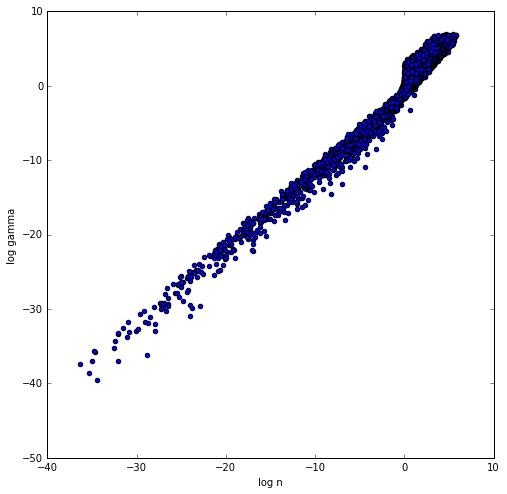

In [222]:
plot_gamma(gamma_wt, n_wt)

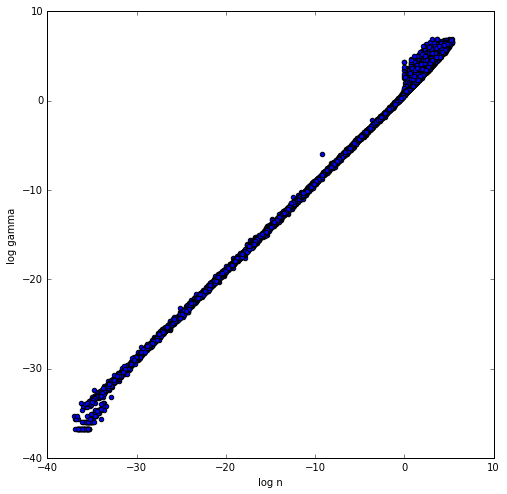

In [223]:
plot_gamma(gamma_dt, n_dt)

## Регуляризатор разреживания из ARTM

In [224]:
# design experiment

D, W = origin_freq_matrix.shape
T = 5

np.random.seed(42)

phi_matrix = np.random.uniform(size=(T, W)).astype(np.float64)
phi_matrix /= np.sum(phi_matrix, axis=1)[:, np.newaxis]

theta_matrix = np.random.uniform(size=(D, T)).astype(np.float64)
theta_matrix /= np.sum(theta_matrix, axis=1)[:, np.newaxis]

no_selection_params = {
    'method': perform_e_step_update,
    'block_size': 50,
    'p_dwt_processor': trivial_p_dwt_processor
}

regularizations_list = np.zeros(50, dtype=object)
params_list = np.zeros(50, dtype=object)

regularizations_list[:40] = trivial_regularization
regularizations_list[40:] = create_reg_lda(-0.5, -0.1)
params_list[:] = no_selection_params

phi, theta = launch_em(
    freq_matrix=origin_freq_matrix, 
    phi_matrix=phi_matrix,
    theta_matrix=theta_matrix,
    regularizations_list=regularizations_list,
    params_list=params_list,
    iters_count=50
)

In [225]:
evaluate(origin_freq_matrix, phi, theta, dataset)

L				-1400298.0
Average topic correlation	0.2494
Phi nonzeros			9480 	frac	0.57646701125
Theta nonzeros			7097 	frac	0.479365079365
SVM score			0.7771
Average top PMI			1.0597


Получены гораздо более разреженные матрицы $\Phi$ и $\Theta$. Однако, правдоподобие не сильно хуже чем у PLSA, как и качество при обучении SVM. Но зато полученные матрицы уже хорошо разрежены. Минус в том, что оптимальные $\alpha$ подбирались очень долго.

In [226]:
phi_sparse, theta_sparse = phi, theta

In [227]:
gamma_wt, n_wt, gamma_dt, n_dt = get_gamma(origin_freq_matrix, phi, theta)

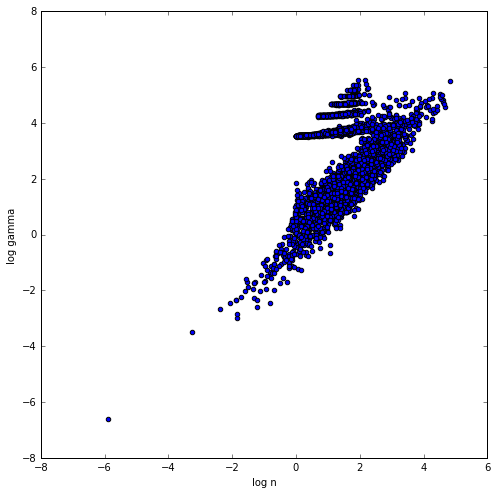

In [228]:
plot_gamma(gamma_wt, n_wt)

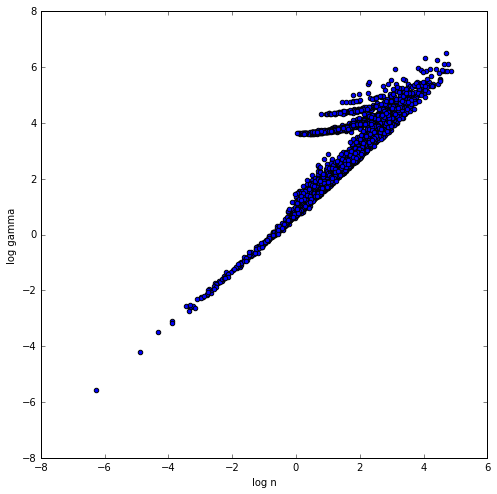

In [229]:
plot_gamma(gamma_dt, n_dt)

## OBD для $\Phi$ и $\Theta$

0
L -1610378.72281
1
L -1480155.75563
2
L -1477294.73295
3
L -1474581.08475
4
L -1471566.47442
5
L -1468038.01261
6
L -1463939.8404
7
L -1459314.43839
8
L -1454231.50934
9
L -1448819.96422
10
L -1443319.93101
11
L -1438015.36591
12
L -1433146.26089
13
L -1428814.28471
14
L -1425008.33418
15
L -1421715.35206
16
L -1418880.51088
17
L -1416416.43992
18
L -1414271.6144
19
L -1412422.92512
20
L -1410826.07724
21
L -1409441.82621
22
L -1408256.10748
23
L -1407210.92904
24
L -1406268.37585
25
L -1405453.26781
26
L -1404759.09307
27
L -1404152.00032
28
L -1403614.71265
29
L -1403140.57277
30
L -1402728.54241
31
L -1402359.36497
32
L -1402025.45879
33
L -1401738.15008
34
L -1401490.27167
35
L -1401269.50614
36
L -1401064.95028
37
L -1400870.68651
38
L -1400701.8499
39
L -1400558.24648
40
L -1400431.55591
41
L -1400309.44315
42
L -1400502.89701
43
L -1401691.1862
44
L -1408667.23495
45
L -1420313.84798
46
L -1438248.04027
47
L -1444953.92569
48
L -1445656.49632
49
L -1446089.2221


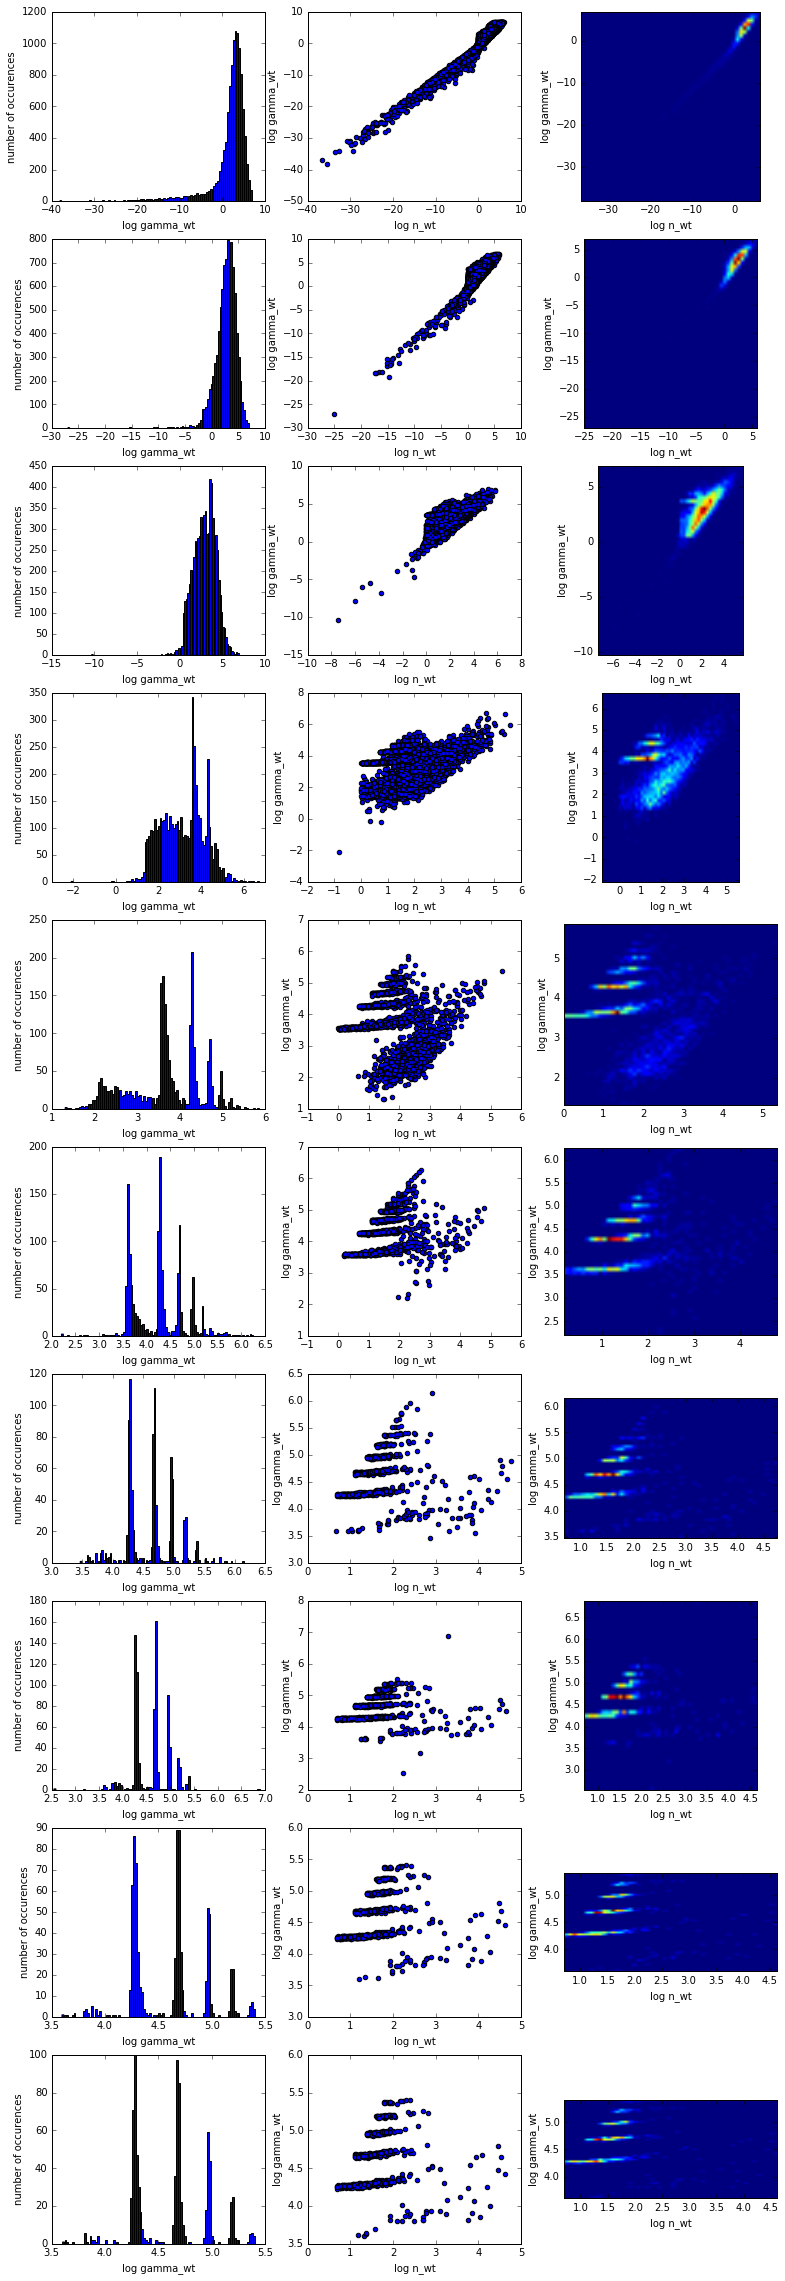

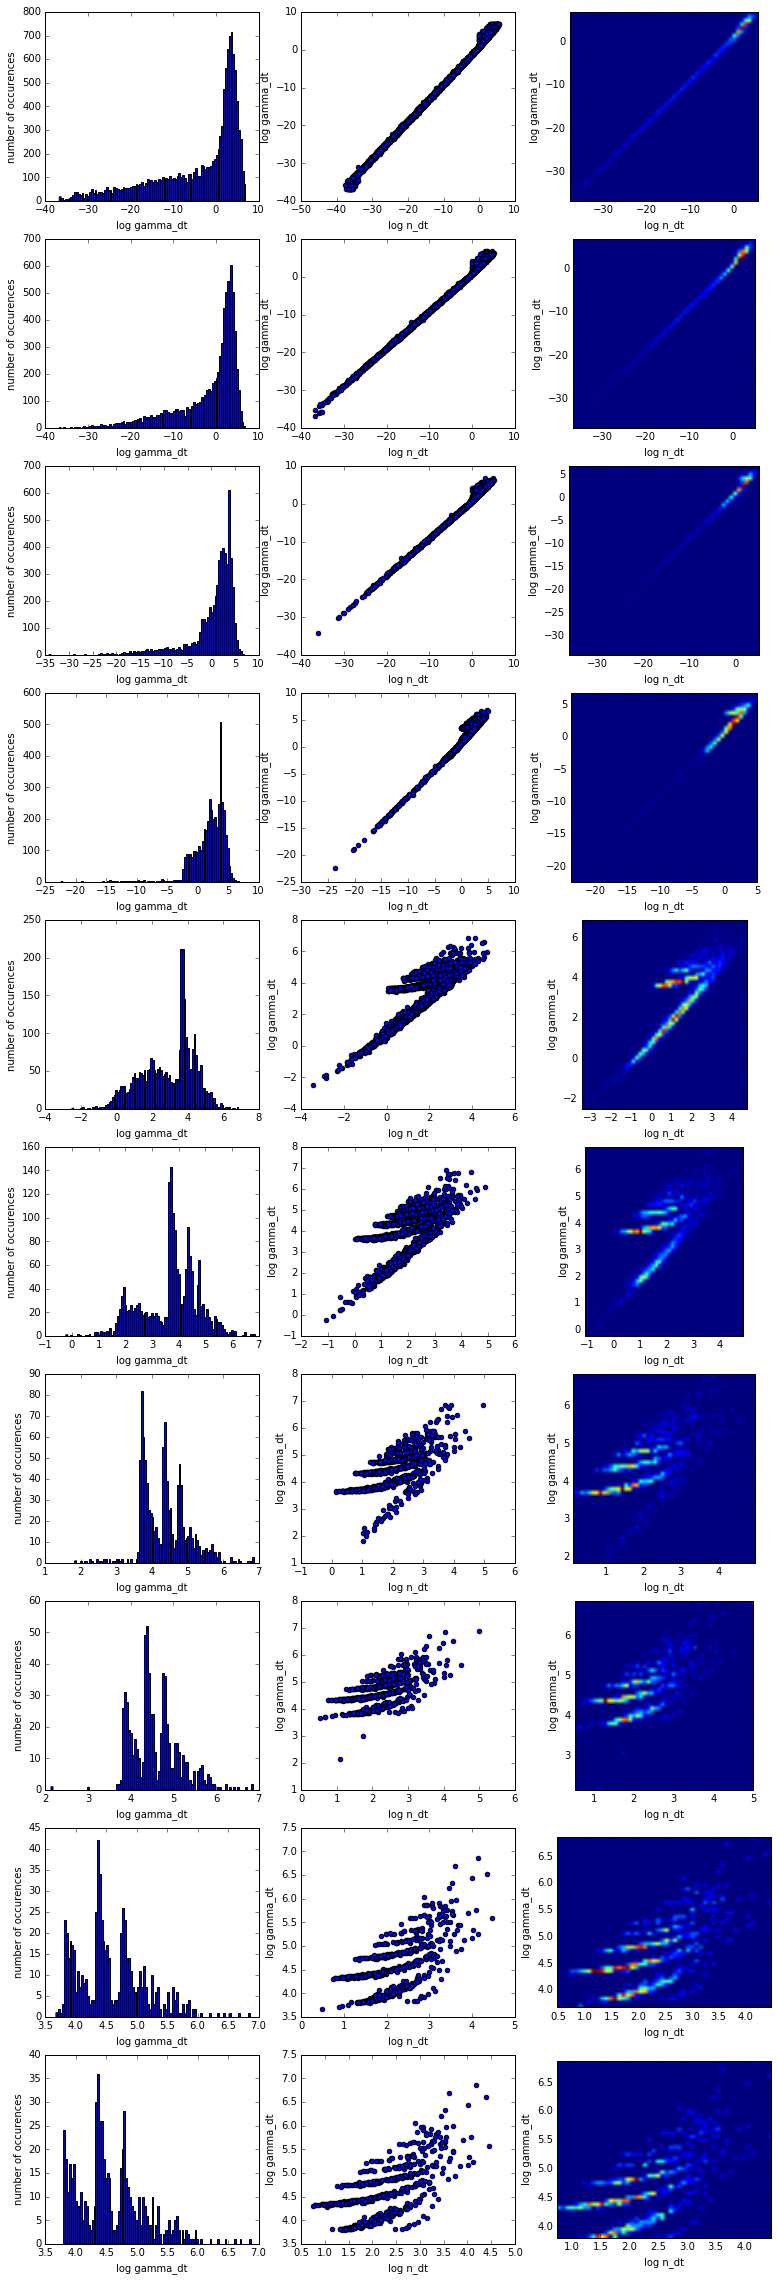

In [243]:
# design experiment

D, W = origin_freq_matrix.shape
T = 5

np.random.seed(42)

phi_matrix = np.random.uniform(size=(T, W)).astype(np.float64)
phi_matrix /= np.sum(phi_matrix, axis=1)[:, np.newaxis]

theta_matrix = np.random.uniform(size=(D, T)).astype(np.float64)
theta_matrix /= np.sum(theta_matrix, axis=1)[:, np.newaxis]

event_handler = GammaHandler(10) #EmptyHandler()

no_selection_params = {
    'method': perform_e_step_update,
    'block_size': 50,
    'p_dwt_processor': trivial_p_dwt_processor,
    'event_handler': event_handler
}
obg_selection_params = {
    'method': perform_obg_e_step_update,
    'block_size': 50,
    'phi_obg': True,
    'phi_percentile': 90,
    'phi_k_size': 1,
    'phi_min_bound': 0.1,
    #'phi_max_bound': 10.,
    'theta_percentile': 90,
    'theta_obg': True,
    'theta_min_bound': 0.1,
    #'theta_max_bound': 10.,
    'event_handler': event_handler,
    'theta_k_size': 1
}

regularizations_list = np.zeros(50, dtype=object)
params_list = np.zeros(50, dtype=object)

regularizations_list[:40] = trivial_regularization
regularizations_list[40:] = trivial_regularization
params_list[:40] = no_selection_params
params_list[40:] = obg_selection_params

phi, theta = launch_em(
    freq_matrix=origin_freq_matrix, 
    phi_matrix=phi_matrix,
    theta_matrix=theta_matrix,
    regularizations_list=regularizations_list,
    params_list=params_list,
    iters_count=50
)
event_handler.final()

In [236]:
evaluate(origin_freq_matrix, phi, theta, dataset)

L				-1428626.0
Average topic correlation	0.2494
Phi nonzeros			7495 	frac	0.455761629675
Theta nonzeros			5930 	frac	0.400540357987
SVM score			0.7754
Average top PMI			1.0634


Правдобие немного ухудшилось, но благодаря этому матрицы ещё более разреженные получились. SVM качество осталось таким же. Зато на подбор параметров ушло много меньше времени.

In [232]:
gamma_wt, n_wt, gamma_dt, n_dt = get_gamma(origin_freq_matrix, phi, theta)

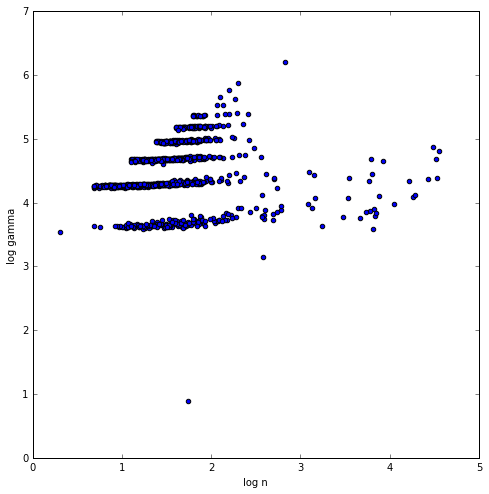

In [233]:
plot_gamma(gamma_wt, n_wt)

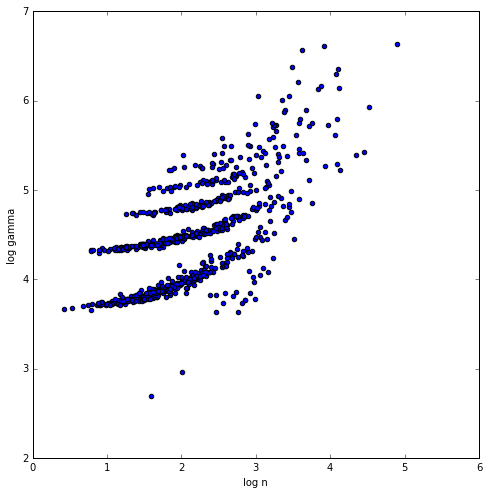

In [234]:
plot_gamma(gamma_dt, n_dt)

In [237]:
# design experiment

D, W = origin_freq_matrix.shape
T = 5

np.random.seed(42)

phi_matrix = np.random.uniform(size=(T, W)).astype(np.float64)
phi_matrix /= np.sum(phi_matrix, axis=1)[:, np.newaxis]

theta_matrix = np.random.uniform(size=(D, T)).astype(np.float64)
theta_matrix /= np.sum(theta_matrix, axis=1)[:, np.newaxis]

event_handler = GammaHandler(10) #EmptyHandler()

no_selection_params = {
    'method': perform_e_step_update,
    'block_size': 50,
    'p_dwt_processor': trivial_p_dwt_processor,
    'event_handler': event_handler
}
obg_selection_params = {
    'method': perform_e_step_update_naive_obd,
    'block_size': 50,
    'phi_obg': True,
    'phi_percentile': 96,
    'phi_max_bound': 1.0,
    'phi_min_bound': 1e-5,
    'theta_percentile': 95,
    'theta_obg': True,
    'theta_max_bound': 0.2,
    'theta_min_bound': 0.1,
    'event_handler': event_handler,
}

regularizations_list = np.zeros(50, dtype=object)
params_list = np.zeros(50, dtype=object)

regularizations_list[:40] = trivial_regularization
regularizations_list[40:] = trivial_regularization
params_list[:40] = no_selection_params
params_list[40:] = obg_selection_params

phi, theta = launch_em(
    freq_matrix=origin_freq_matrix, 
    phi_matrix=phi_matrix,
    theta_matrix=theta_matrix,
    regularizations_list=regularizations_list,
    params_list=params_list,
    iters_count=50
)
event_handler.final()

0
L -1610378.72281
1
L -1480155.75563
2
L -1477294.73295
3
L -1474581.08475
4
L -1471566.47442
5
L -1468038.01261
6
L -1463939.8404
7
L -1459314.43839
8
L -1454231.50934
9
L -1448819.96422
10
L -1443319.93101
11
L -1438015.36591
12
L -1433146.26089
13
L -1428814.28471
14
L -1425008.33418
15
L -1421715.35206
16
L -1418880.51088
17
L -1416416.43992
18
L -1414271.6144
19
L -1412422.92512
20
L -1410826.07724
21
L -1409441.82621
22
L -1408256.10748
23
L -1407210.92904
24
L -1406268.37585
25
L -1405453.26781
26
L -1404759.09307
27
L -1404152.00032
28
L -1403614.71265
29
L -1403140.57277
30
L -1402728.54241
31
L -1402359.36497
32
L -1402025.45879
33
L -1401738.15008
34
L -1401490.27167
35
L -1401269.50614
36
L -1401064.95028
37
L -1400870.68651
38
L -1400701.8499
39
L -1400558.24648
0.1 6814
40
L -1400431.55591
0.2 7091
41
L -1400313.41123
0.2 7147
42
L -1400205.954
0.2 7195
43
L -1400105.46291
0.2 7241
44
L -1400006.70046
0.2 7281
45
L -1400004.12668
0.2 7313
46
L -1399977.68184
0.2 7344
47


In [238]:
evaluate(origin_freq_matrix, phi, theta, dataset)

L				-1399735.0
Average topic correlation	0.2494
Phi nonzeros			9954 	frac	0.605290361812
Theta nonzeros			7404 	frac	0.500101317123
SVM score			0.7801
Average top PMI			1.0555


In [199]:
gamma_wt, n_wt, gamma_dt, n_dt = get_gamma(origin_freq_matrix, phi, theta)

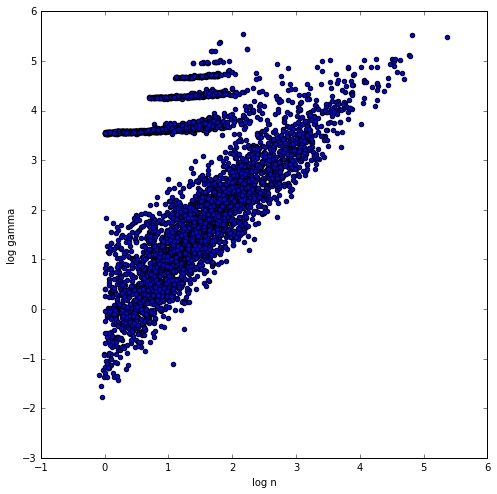

In [200]:
plot_gamma(gamma_wt, n_wt)

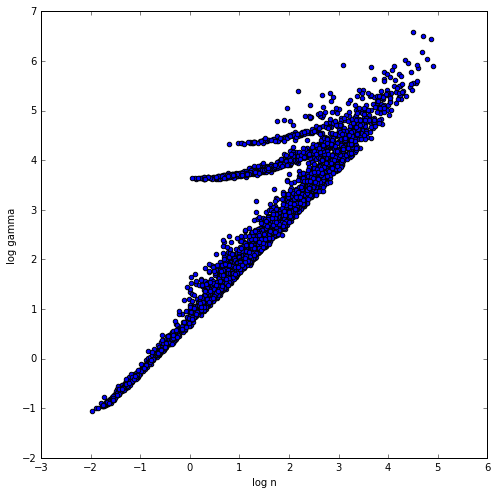

In [195]:
plot_gamma(gamma_dt, n_dt)

In [36]:
# design experiment

D, W = origin_freq_matrix.shape
T = 5

np.random.seed(42)

obg_selection_params = {
    'method': perform_obg_e_step_update,
    'block_size': 50,
    'percentile': 98.5,
    'theta_percentile': 97,
    'theta_obg': True,
    'min_bound': -0.1,
    'return_gamma': True
}

regularizations_list = np.zeros(10, dtype=object)
params_list = np.zeros(10, dtype=object)

regularizations_list[:] = trivial_regularization
params_list[:] = obg_selection_params

logger = GammaWTLogger(10, 0)
phi, theta = launch_em(
    freq_matrix=origin_freq_matrix, 
    phi_matrix=phi_sparse,
    theta_matrix=theta_sparse,
    logger=logger,
    regularizations_list=regularizations_list,
    params_list=params_list,
    iters_count=10
)

NameError: name 'GammaWTLogger' is not defined

In [ ]:
evaluate(origin_freq_matrix, phi, theta, dataset)

## Ещё одно альтернативное решение: разреживать $p_{tdw}$ на Е шаге, чтобы каждое вхождение слова в документ описывалось небольшим числом тем.

In [47]:
# design experiment

D, W = origin_freq_matrix.shape
T = 5

np.random.seed(42)

phi_matrix = np.random.uniform(size=(T, W)).astype(np.float64)
phi_matrix /= np.sum(phi_matrix, axis=1)[:, np.newaxis]

theta_matrix = np.random.uniform(size=(D, T)).astype(np.float64)
theta_matrix /= np.sum(theta_matrix, axis=1)[:, np.newaxis]

big_selection_params = {
    'method': perform_e_step_update,
    'block_size': 50,
    'p_dwt_processor': create_frac_of_max_p_dwt_processor(0.5)
}
no_selection_params = {
    'method': perform_e_step_update,
    'block_size': 50,
    'p_dwt_processor': trivial_p_dwt_processor
}

regularizations_list = np.zeros(50, dtype=object)
params_list = np.zeros(50, dtype=object)

regularizations_list[:] = trivial_regularization
params_list[:40] = no_selection_params
params_list[40:47] = big_selection_params
params_list[47:50] = no_selection_params

phi, theta = launch_em(
    freq_matrix=origin_freq_matrix, 
    phi_matrix=phi_matrix,
    theta_matrix=theta_matrix,
    regularizations_list=regularizations_list,
    params_list=params_list,
    iters_count=50
)

In [48]:
evaluate(origin_freq_matrix, phi, theta, dataset)

L				-1400878.0
Average topic correlation	0.2495
Phi nonzeros			10011 	frac	0.60875646093
Theta nonzeros			6125 	frac	0.413711583924
SVM score			0.771
Average top PMI			1.0294


Получается очень хорошее разреживание $\Theta$, неплохое разреживание $\Phi$. Однако SVM качество падает.

In [122]:
phi_sparse_ptdw, theta_sparse_ptdw = phi, theta

In [123]:
gamma_wt, n_wt, gamma_dt, n_dt = get_gamma(origin_freq_matrix, phi, theta)

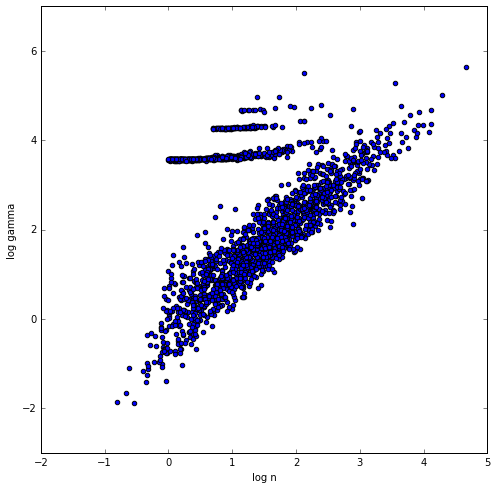

In [124]:
plot_gamma(gamma_wt, n_wt)

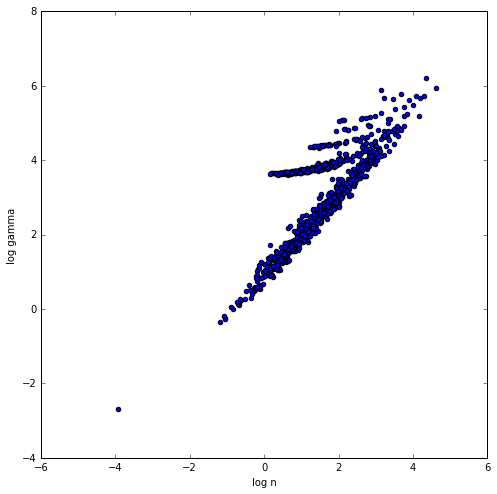

In [125]:
plot_gamma(gamma_dt, n_dt)